## Assignments for Week-02

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

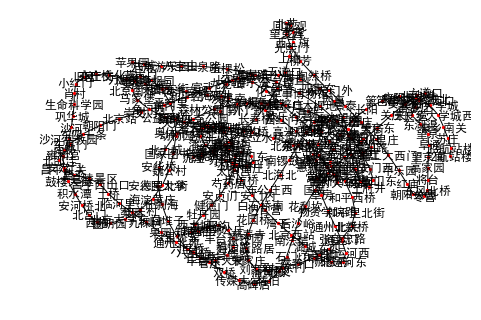

In [51]:
import requests
import re
from collections import defaultdict
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import networkx as nx
from collections import defaultdict
import collections
location="""
苹果园,39.9263251384,116.1777806282|古城,39.9072014648,116.1902475357|八角游乐园,39.9074319023,116.2128210068|八宝山,39.9072673042,116.2358236313|玉泉路,39.9073331435,116.2530326843|五棵松,39.9078269362,116.2740182877|万寿路,39.9074319023,116.2951755524|公主坟,39.9074319023,116.3097667694|军事博物馆,39.9074648219,116.3240146637|木樨地,39.9076294195,116.3374471664|南礼士路,39.9072014648,116.3525962830|复兴门,39.9071685451,116.3565444946|西单,39.9074319023,116.3742685318|天安门西,39.9074648219,116.3917350769|天安门东,39.9077281779,116.4016485214|王府井,39.9080244523,116.4115619659|东单,39.9081890486,116.4179134369|建国门,39.9085182400,116.4358091354|永安里,39.9083865636,116.4504861832|国贸,39.9091436994,116.4619016647|大望路,39.9085182400,116.4770936966|四惠,39.9087157541,116.4954614639|四惠东,39.9085182400,116.5153312683|北京站,39.9049628889,116.4272689819|崇文门,39.9009793597,116.4168834686|前门,39.8999587488,116.3979578018|和平门,39.9000904414,116.3841819763|宣武门,39.8996624396,116.3743114471|长椿街,39.8996295163,116.3630676270|阜成门,39.9233960408,116.3559865952|车公庄,39.9322487730,116.3558149338|西直门,39.9404422892,116.3554716110|积水潭,39.9487335236,116.3731956482|鼓楼大街,39.9478123250,116.3938379288|安定门,39.9491283193,116.4083003998|雍和宫,39.9492599173,116.4169692993|东直门,39.9411332638,116.4336633682|东四十条,39.9338612292,116.4340066910|朝阳门,39.9249428832,116.4346075058|安河桥北,40.0118554028,116.2699842453|北宫门,40.0023554989,116.2776875496|西苑,39.9983283241,116.2909269333|圆明园,39.9994954074,116.3096809387|北京大学东门,39.9921473816,116.3159036636|中关村,39.9838449697,116.3164830208|海淀黄庄,39.9756402091,116.3175773621|人民大学,39.9674015726,116.3213539124|魏公村,39.9578132466,116.3232851028|国家图书馆,39.9432061456,116.3251948357|动物园,39.9382047998,116.3388204575|新街口,39.9405080966,116.3677883148|平安里,39.9336637876,116.3728952408|西四,39.9245808594,116.3734102249|灵境胡同,39.9160892062,116.3737535477|菜市口,39.8894554507,116.3739252090|陶然亭,39.8785388760,116.3743543625|北京南站,39.8648536559,116.3792896271|马家堡,39.8532248377,116.3712644577|角门西,39.8459269952,116.3711357117|公益西桥,39.8370219177,116.3708353043|天通苑北,40.0833908853,116.4129781723|天通苑,40.0752145100,116.4131069183|天通苑南,40.0663146083,116.4129352570|立水桥,40.0530775487,116.4122486115|立水桥南,40.0418420964,116.4146518707|北苑路北,40.0305062112,116.4180421829|大屯路东,40.0038019364,116.4173340797|惠新西街北口,39.9875113077,116.4170658588|惠新西街南口,39.9769967756,116.4174628258|和平西桥,39.9685321828,116.4179724455|和平里北街,39.9584074165,116.4185062051|北新桥,39.9408618103,116.4168727398|张自忠路,39.9336596743,116.4171463251|东四,39.9243700208,116.4174936712|灯市口,39.9172165503,116.4177873731|磁器口,39.8931227334,116.4187248051|天坛东门,39.8830639907,116.4208289981|蒲黄榆,39.8656647996,116.4215612411|刘家窑,39.8576455856,116.4221245050|宋家庄,39.8457869613,116.4283740520|海淀五路居,39.9325778488,116.2767648697|慈寿寺,39.9330879131,116.2951755524|花园桥,39.9323721766,116.3101047277|白石桥南,39.9330241553,116.3254737854|车公庄西,39.9324719277,116.3439850509|北海北,39.9332730162,116.3867032528|南锣鼓巷,39.9331372740,116.4032471180|东大桥,39.9228797332,116.4517012239|呼家楼,39.9231985690,116.4618426561|金台路,39.9228159658,116.4780861139|十里堡,39.9230689778,116.5018987656|青年路,39.9231615430,116.5175521374|褡裢坡,39.9240213643,116.5634393692|黄渠,39.9241694664,116.5782129765|常营,39.9257574298,116.5995419025|草房,39.9244286443,116.6154688597|俸伯,40.1325679642,116.6849541664|顺义,40.1302465359,116.6568553448|石门,40.1298445844,116.6413360834|南法信,40.1283926174,116.6094338894|后沙峪,40.1140845728,116.5642333031|花梨坎,40.0843923417,116.5576457977|国展,40.0701407233,116.5551674366|孙河,40.0451275079,116.5346109867|马泉营,40.0337675249,116.5038192272|崔各庄,40.0222084635,116.4929187298|望京,39.9987146144,116.4697873592|望京西,39.9959858785,116.4515912533|张郭庄,39.8583147471,116.1871576309|园博园,39.8612301562,116.2019205093|大瓦窑,39.8595830477,116.2395787239|郭庄子,39.8643780825,116.2531399727|大井,39.8652077604,116.2763088942|七里庄,39.8675310111,116.2942126393|西局,39.8664841684,116.3043808937|泥洼,39.8583188650,116.3043862581|丰台站,39.8498560655,116.3050138950|首经贸,39.8444483875,116.3202059269|纪家庙,39.8444154376,116.3332575560|草桥,39.8459434698,116.3511532545|角门西,39.8459414105,116.3711491227|角门东,39.8451444491,116.3849544525|大红门,39.8453750952,116.3988295197|石榴庄,39.8459022834,116.4139866829|成寿寺,39.8458652156,116.4474123716|分钟寺,39.8518740541,116.4539784193|十里河,39.8658089104,116.4590156078|潘家园,39.8754718785,116.4607697725|劲松,39.8844378292,116.4613223076|双井,39.8935590076,116.4616280794|金台夕照,39.9167145964,116.4618426561|团结湖,39.9337296015,116.4618694782|农业展览馆,39.9417090706,116.4621269703|亮马桥,39.9490830824,116.4619070292|三元桥,39.9613658535,116.4568376541|太阳宫,39.9727954429,116.4475035667|芍药居,39.9778107025,116.4361524582|安贞门,39.9769803325,116.4059722424|北土城,39.9766884674,116.3944441080|建德门,39.9767090213,116.3813495636|牡丹园,39.9763184957,116.3699018955|西土城,39.9761869497,116.3538730145|知春路,39.9764705954,116.3399469852|知春里,39.9763143849,116.3286226988|海淀黄庄,39.9760060736,116.3175827265|苏州街,39.9756340428,116.3062664866|巴沟,39.9741726205,116.2940597534|火器营,39.9660160357,116.2890118361|长春桥,39.9583107871,116.2943869829|车道沟,39.9481331009,116.2938773632|西钓鱼台,39.9232973050,116.2976646423|莲花桥,39.8976787809,116.3103997707|六里桥,39.8803337264,116.3027608395|新宫,39.8122529769,116.3655996323|西红门,39.7895938573,116.3287568092|高米店北,39.7733841750,116.3308489323|高米店南,39.7634223137,116.3317823410|枣园,39.7535909846,116.3319754601|清源路,39.7426693062,116.3325119019|黄村西大街,39.7313828531,116.3326191902|黄村火车站,39.7229498085,116.3325762749|义和庄,39.7125019650,116.3190150261|生物医药基地,39.6866148672,116.3222551346|天宫院,39.6702157844,116.3199269772|西二旗,40.0532050000,116.3128290000|朱辛庄,40.104338,116.313621|立水桥,40.053041,116.412412|霍营,40.072012,116.360143|回龙观,40.070786,116.336267|龙泽,40.070804,116.319592|西二旗,40.05285379,116.306156|上地,40.032981,116.320205|育知路,40.087813,116.327352|平西府,40.09019,116.350606|回龙观东大街,40.08112,116.363253|四惠东,39.908484,116.515367|四惠,39.908789,116.495463|大望路,39.90860514,116.475794|国贸,39.908506,116.4601|永安里,39.90855278, 116.45046|建国门,39.90860684,116.4352424|东单,39.908283,116.418076|王府井,39.90811,116.41142|天安门东,39.907791,116.401565|天安门西,39.90748,116.391666|西单,39.9073245,116.3769353|复兴门,39.90723718,116.3571631|南礼士路,39.907254,116.352627|木樨地,39.907471,116.337475|军事博物馆,39.907692,116.321864|公主坟,39.907497,116.310096|万寿路,39.907475,116.295134|五棵松,39.907494,116.274048|玉泉路,39.907466,116.253036|八宝山,39.907437,116.235718|八角游乐园,39.907401,116.212686|古城,39.907436,116.190598|苹果园,39.926154,116.1776546|鼓楼大家,39.948976,116.393599|安定门,39.949184,116.408265|雍和宫,39.948423,116.416588|东直门,39.941401,116.433763|东四十条,39.933661,116.434216|朝阳门,39.924608,116.433809|建国门,39.90860684,116.4352424|北京站,39.905074,116.427139|崇文门,39.900343,116.418579|前门,39.900132,116.397957|和平门,39.900081,116.384195|宣武门,39.8997255,116.3743353|长椿街,39.899451,116.363384|复兴门,39.90723718,116.3571631|阜成门,39.92373828,116.3562324|车公庄,39.932752,116.355887|西直门,39.94030355,116.3554137|安和桥北,40.012316,116.27006|北宫门,40.002316,116.277583|西苑,39.998389,116.29071|圆明园,39.999496,116.309505|北京大学东门,39.992114,116.315734|中关村,39.984078,116.316496|海淀黄庄,39.976014,116.317799|人民大学,39.966976,116.321483|魏公村,39.957744,116.323231|国家图书馆,39.943119,116.325331|动物园,39.93829,116.338606|西直门,39.94030355,116.3554137|新街口,39.940601,116.36767|平安里,39.932718,116.371476|西四,39.92396,116.373454|灵境胡同,39.916091,116.373752|西单,39.9072215,116.3739083|宣武门,39.8997255,116.3743353|菜市口,39.889318,116.374517|陶然亭,39.878552,116.374416|北京南站,39.86485297,116.3790084|马家堡,39.853212,116.371388|角门西,39.845906,116.371077|公益西桥,39.837114,116.370829|新宫,39.81245,116.365553|西红门,39.78978437,116.3285588|高米店北,39.77395,116.330708|高米店南,39.763371,116.331765|枣园,39.753389,116.3323329|清源路,39.742678,116.33235|黄村西大街,39.73173264,116.3323563|黄村火车站,39.722669,116.332817|义和庄,39.71254959,116.3189502|生物医药基地,39.68652,116.321731|天宫院,39.670299,116.31988
"""

class BJ:
    
    def __init__(self,url='http://www.bjsubway.com/station/zjgls/#'):
        
        self.__ulr = url
        self.__headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
        self.__response=requests.get(self.__ulr,headers=self.__headers, 
                                     allow_redirects=False,
                                     verify=False).content.decode('gbk')
        
        
    def __get_all_stations_info(self):
        pattern_line_name=re.compile(r'<td colspan="\d">(.*?)</td>')
        result=pattern_line_name.findall(self.__response)
        pattern_station=re.compile(r'<tbody>[\s\S]*?</tbody>')
        result2=pattern_station.findall(self.__response)

        total_line_station={}
        station_distance={}
        distance_pattern=re.compile(r'\d+</td>')
        for line,station in zip(result,result2):
            x=station.split('——')
            distance=distance_pattern.findall(station)
            distance=[x.split('</td>')[0] for x in distance]
            if len(line)<=13:
                line=line[:3]
            else:
                line=line[:4]
            total_line_station[line]=[i.split('<th>')[-1] for i in  x]
            total_line_station[line][-1]=total_line_station[line][-1].split('</th')[0]
            for i in range(0,len(total_line_station[line])-1):
                station_distance[total_line_station[line][i]]=\
                    (total_line_station[line][i+1]+' '+distance[i])
                    
        return total_line_station,station_distance
    
    def __get_location(self,location):
        pattern=re.compile(r'(\w+),(\d+.\d+),(\d+.\d+)')
        result=pattern.findall(location)
        graph={}
        for value in result:
            graph[value[0]]=(float(value[1]),float(value[-1]))
        return graph
    
    
    # 合并所有地铁站信息
    def __merge_graph(self,total_line_station):
        total_station=list(total_line_station.values())
        stations_connection = defaultdict(list)
        for line in total_station:
            for station1 in line:
                for station2 in line:
                    if station1==station2:
                        continue
                    stations_connection[station1].append(station2)
#                     stations_connection[station1]=list(set(stations_connection[station1]))
                    stations_connection[station2].append(station1)
#                     stations_connection[station2]=list(set(stations_connection[station2]))

        return stations_connection
    
    def __get_distance(self,start,station_distance):
        if not station_distance or not start:
            print('You are missing at least one factors!')
        return int(station_distance[start].split(' ')[-1])
    
    def search(self,start, destination, connection_grpah, sort_candidate=None):
        if not isinstance(connection_grpah,collections.defaultdict):
            raise TypeError('wrong graph type')
        pathes=[[start]]
                
        visited=set()
                
        while pathes:
            path=pathes.pop(0)
            froninter=path[-1] # 重复取值?
            if froninter in visited:
                continue
            # 获取当前前置节点的所有链接节点
            successor=connection_grpah[froninter]
            
            for station in successor:
                if station in path:
                    continue
                new_line=path+[station]
                pathes.append(new_line)
                if start==destination:
                    return new_line
                
            visited.add(froninter)
        if sort_candidate:
            pathes=sort_candidate(pathes)
        return pathes
                
    
    def cal_culate_some_results(self):
        total_line_station,station_distance=self.__get_all_stations_info()
        global location
        graph=self.__get_location(location)
        stations_connection=self.__merge_graph(total_line_station)
        return total_line_station,station_distance,graph,stations_connection
    
def min_transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

                
def shortest_distance(pathes):
    if not pathes or len(pathes)<1:
        return pathes
                
    def get_path_distance(path):
        distance=0
        for i in range(1,len(path)):
            distance+=self.__get_distance(path[i-1],path[i])
        return sorted(pathes, key=get_path_distance)
            
        
if __name__=='__main__':
    bj=BJ()
    total_line_station,station_distance,graph,stations_connection=bj.cal_culate_some_results()
    bj_station_graph = nx.Graph()
    bj_station_graph.add_path(stations_connection)
    nx.draw(bj_station_graph,with_labels=True, node_size=5)
    plt.show()
    bj.search('苹果园','宣武门',stations_connection)
#     bj.search('苹果园','军事博物馆',stations_connection)

False

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)